In [1]:
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import numpy as np

# #圖片顯示分頁
# import matplotlib
# matplotlib.use('TkAgg')  # 或者使用其他支援圖形的後端
# import matplotlib.pyplot as plt

In [2]:
class fuzzy_system:
    def __init__(self):
        # fuzzy rule
        self.error_gauss_center = [-5, -3, -1, 0, 1, 3, 5]
        self.delta_gauss_center = [-5, -3, -1, 0, 1, 3, 5]
        self.output_gauss_center = [-5, -3, -1, 0, 1, 3, 5]

        self.error_gauss_width = [2, 2, 2, 2, 2, 2, 2]
        self.delta_gauss_width = [2, 2, 2, 2, 2, 2, 2]
        self.output_gauss_width = [2, 2, 2, 2, 2, 2, 2]

    def get_gauss_center(self, case, index):
        if case == 'error':
            return self.error_gauss_center[index]
        elif case == 'delta':
            return self.delta_gauss_center[index]
        elif case == 'output':
            return self.output_gauss_center[index]
        
    def get_gauss_width(self, case, index):
        if case == 'error':
            return self.error_gauss_width[index]
        elif case == 'delta':
            return self.delta_gauss_width[index]
        elif case == 'output':
            return self.output_gauss_width[index]
    
    def restart_system(self):

        input_error = np.arange(-11, 11, 0.1, np.float32)
        input_delta = np.arange(-11, 11, 0.1, np.float32)
        output_u = np.arange(-11, 11, 0.1, np.float32)

        error = ctrl.Antecedent(input_error, 'error')
        delta = ctrl.Antecedent(input_delta, 'delta')
        self.output = ctrl.Consequent(output_u, 'output')

        error['nb'] = fuzz.gaussmf(error.universe,self.error_gauss_center[0], self.error_gauss_width[0])
        error['nm'] = fuzz.gaussmf(error.universe, self.error_gauss_center[1], self.error_gauss_width[1])
        error['ns'] = fuzz.gaussmf(error.universe, self.error_gauss_center[2], self.error_gauss_width[2])
        error['zo'] = fuzz.gaussmf(error.universe, self.error_gauss_center[3], self.error_gauss_width[3])
        error['ps'] = fuzz.gaussmf(error.universe, self.error_gauss_center[4], self.error_gauss_width[4])
        error['pm'] = fuzz.gaussmf(error.universe, self.error_gauss_center[5], self.error_gauss_width[5])
        error['pb'] = fuzz.gaussmf(error.universe, self.error_gauss_center[6], self.error_gauss_width[6])

        delta['nb'] = fuzz.gaussmf(delta.universe, self.delta_gauss_center[0], self.delta_gauss_width[0])
        delta['nm'] = fuzz.gaussmf(delta.universe, self.delta_gauss_center[1], self.delta_gauss_width[1])
        delta['ns'] = fuzz.gaussmf(delta.universe, self.delta_gauss_center[2], self.delta_gauss_width[2])
        delta['zo'] = fuzz.gaussmf(delta.universe, self.delta_gauss_center[3], self.delta_gauss_width[3])
        delta['ps'] = fuzz.gaussmf(delta.universe, self.delta_gauss_center[4], self.delta_gauss_width[4])
        delta['pm'] = fuzz.gaussmf(delta.universe, self.delta_gauss_center[5], self.delta_gauss_width[5])
        delta['pb'] = fuzz.gaussmf(delta.universe, self.delta_gauss_center[6], self.delta_gauss_width[6])

        self.output['nb'] = fuzz.gaussmf(self.output.universe, self.output_gauss_center[0], self.output_gauss_width[0])
        self.output['nm'] = fuzz.gaussmf(self.output.universe, self.output_gauss_center[1], self.output_gauss_width[1])
        self.output['ns'] = fuzz.gaussmf(self.output.universe, self.output_gauss_center[2], self.output_gauss_width[2])
        self.output['zo'] = fuzz.gaussmf(self.output.universe, self.output_gauss_center[3], self.output_gauss_width[3])
        self.output['ps'] = fuzz.gaussmf(self.output.universe, self.output_gauss_center[4], self.output_gauss_width[4])
        self.output['pm'] = fuzz.gaussmf(self.output.universe, self.output_gauss_center[5], self.output_gauss_width[5])
        self.output['pb'] = fuzz.gaussmf(self.output.universe, self.output_gauss_center[6], self.output_gauss_width[6])

        rule0 = ctrl.Rule(antecedent=(error['nb'] & delta['nb']), consequent=self.output['nb'], label='rule nb')

        rule1 = ctrl.Rule(antecedent=((error['nm'] & delta['nb']) |
                                    (error['ns'] & delta['nb']) |
                                    (error['nb'] & delta['nm']) |
                                    (error['nm'] & delta['nm']) |
                                    (error['nb'] & delta['ns'])
                                    ), consequent=self.output['nm'], label='rule nm')

        rule2 = ctrl.Rule(antecedent=((error['zo'] & delta['nb']) |
                                    (error['ps'] & delta['nb']) |
                                    (error['pm'] & delta['nb']) |
                                    (error['ns'] & delta['nm']) |
                                    (error['zo'] & delta['nm']) |
                                    (error['ps'] & delta['nm']) |
                                    (error['nm'] & delta['ns']) |
                                    (error['ns'] & delta['ns']) |
                                    (error['zo'] & delta['ns']) |
                                    (error['nb'] & delta['zo']) |
                                    (error['nm'] & delta['zo']) |
                                    (error['ns'] & delta['zo']) |
                                    (error['nb'] & delta['ps']) |
                                    (error['nm'] & delta['ps']) |
                                    (error['nb'] & delta['pm']) 
                                    ), consequent=self.output['ns'], label='rule ns')

        rule3 = ctrl.Rule(antecedent=((error['pb'] & delta['nb']) |
                                    (error['pm'] & delta['nm']) |
                                    (error['ps'] & delta['ns']) |
                                    (error['zo'] & delta['zo']) |
                                    (error['ns'] & delta['ps']) |
                                    (error['nm'] & delta['pm']) |
                                    (error['nb'] & delta['pb'])
                                    ), consequent=self.output['zo'], label='rule zo')

        rule4 = ctrl.Rule(antecedent=((error['pb'] & delta['nm']) |
                                    (error['pm'] & delta['ns']) |
                                    (error['pb'] & delta['ns']) |
                                    (error['ps'] & delta['zo']) |
                                    (error['pm'] & delta['zo']) |
                                    (error['pb'] & delta['zo']) |
                                    (error['pm'] & delta['ps']) |
                                    (error['ps'] & delta['ps']) |
                                    (error['zo'] & delta['ps']) |
                                    (error['ps'] & delta['pm']) |
                                    (error['zo'] & delta['pm']) |
                                    (error['ns'] & delta['pm']) |
                                    (error['ns'] & delta['pb']) |
                                    (error['nm'] & delta['pb']) |
                                    (error['zo'] & delta['pb']) 
                                    ), consequent=self.output['ps'], label='rule ps')

        rule5 = ctrl.Rule(antecedent=((error['pb'] & delta['ps']) |
                                    (error['pm'] & delta['pm']) |
                                    (error['pb'] & delta['pm']) |
                                    (error['ps'] & delta['pb']) |
                                    (error['pm'] & delta['pb'])
                                    ), consequent=self.output['pm'], label='rule pm')

        rule6 = ctrl.Rule(antecedent=(error['pb'] & delta['pb']), consequent=self.output['pb'], label='rule pb')

        system = ctrl.ControlSystem(rules=[rule0, rule1, rule2, rule3, rule4, rule5, rule6])
        self.sim = ctrl.ControlSystemSimulation(system)
        

    def calculate(self,error,delta):
        self.sim.input['error'] = error
        self.sim.input['delta'] = delta
        self.sim.compute()
        # self.output.view(sim=self.sim)
        output_m = self.output.Output_membership(sim=self.sim)
        new_u = self.sim.output['output']
        return output_m,new_u
    
    def output_gauss_learning(self,error,learning_rate,output_array_m):
        output_array_m = np.asarray(output_array_m)
        output_g_center = np.asarray(self.output_gauss_center)
        output_g_width = np.asarray(self.output_gauss_width)
        sum_output = np.sum(output_array_m * output_g_center)
        new_gauss_center = output_g_center + (learning_rate * error * output_g_width * output_array_m / sum_output)
        new_gauss_width = output_g_width + (learning_rate * error * output_g_width/ (sum_output^2))*((output_g_width * sum_output) - np.sum(output_g_width * output_g_center))

        return new_gauss_center,new_gauss_width
        
    def new_output_gauss(self,new_gauss_center,new_gauss_width):
        self.output_gauss_center = new_gauss_center
        self.output_gauss_width = new_gauss_width


[2.6996483616157517e-07, 0.002187512124509153, 0.32465278153555555, 0.6065306747379644, 0.8824964033572591, 0.13533543201918397, 0.0003354644500729602]
[2.6996483616157517e-07, 0.002187512124509153, 0.32465278153555555, 0.6065306747379644, 0.8824964033572591, 0.13533543201918397, 0.0003354644500729602]


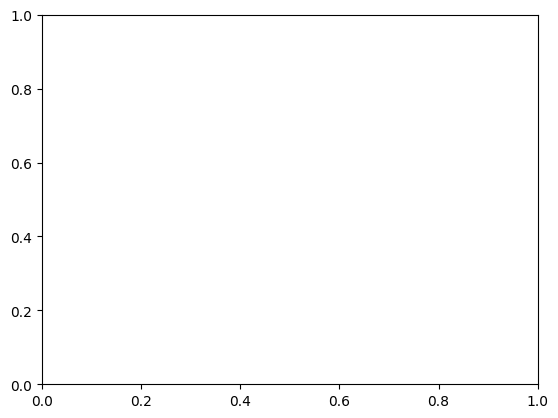

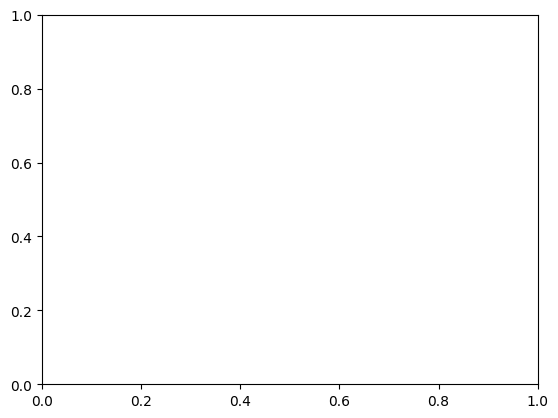

In [3]:
a = fuzzy_system()
a.restart_system()
gauss_center = [3,3,3,3,3,3,10]
a.calculate(6,-3)
# a.output_gauss_learning()
a.restart_system()
a.calculate(6,-3)

In [4]:
input_error = np.arange(-11, 11, 0.1, np.float32)
input_delta = np.arange(-11, 11, 0.1, np.float32)
output_u = np.arange(-11, 11, 0.1, np.float32)


In [5]:
# Create the three fuzzy variables - two inputs, one output
error = ctrl.Antecedent(input_error, 'error')
delta = ctrl.Antecedent(input_delta, 'delta')
output = ctrl.Consequent(output_u, 'output')


In [6]:
error['nb'] = fuzz.gaussmf(error.universe, -5,2)
error['nm'] = fuzz.gaussmf(error.universe, -3,2)
error['ns'] = fuzz.gaussmf(error.universe, -1,2)
error['zo'] = fuzz.gaussmf(error.universe, 0,2)
error['ps'] = fuzz.gaussmf(error.universe, 1,2)
error['pm'] = fuzz.gaussmf(error.universe, 3,2)
error['pb'] = fuzz.gaussmf(error.universe, 5,2)

delta['nb'] = fuzz.gaussmf(delta.universe, -5,2)
delta['nm'] = fuzz.gaussmf(delta.universe, -3,2)
delta['ns'] = fuzz.gaussmf(delta.universe, -1,2)
delta['zo'] = fuzz.gaussmf(delta.universe, 0,2)
delta['ps'] = fuzz.gaussmf(delta.universe, 1,2)
delta['pm'] = fuzz.gaussmf(delta.universe, 3,2)
delta['pb'] = fuzz.gaussmf(delta.universe, 5,2)

output['nb'] = fuzz.gaussmf(output.universe, -5,2)
output['nm'] = fuzz.gaussmf(output.universe, -3,2)
output['ns'] = fuzz.gaussmf(output.universe, -1,2)
output['zo'] = fuzz.gaussmf(output.universe, 0,2)
output['ps'] = fuzz.gaussmf(output.universe, 1,2)
output['pm'] = fuzz.gaussmf(output.universe, 3,2)
output['pb'] = fuzz.gaussmf(output.universe, 5,2)


c:\Users\Jack\.conda\envs\ncu_control_system\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


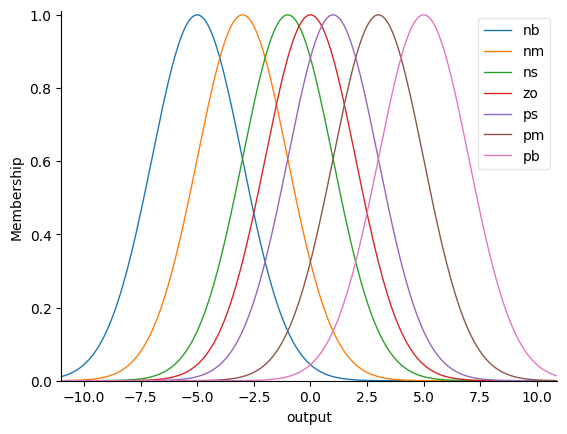

In [7]:
output.view()

In [8]:
rule0 = ctrl.Rule(antecedent=(error['nb'] & delta['nb']), consequent=output['nb'], label='rule nb')

rule1 = ctrl.Rule(antecedent=((error['nm'] & delta['nb']) |
                              (error['ns'] & delta['nb']) |
                              (error['nb'] & delta['nm']) |
                              (error['nm'] & delta['nm']) |
                              (error['nb'] & delta['ns'])
                              ), consequent=output['nm'], label='rule nm')

rule2 = ctrl.Rule(antecedent=((error['zo'] & delta['nb']) |
                              (error['ps'] & delta['nb']) |
                              (error['pm'] & delta['nb']) |
                              (error['ns'] & delta['nm']) |
                              (error['zo'] & delta['nm']) |
                              (error['ps'] & delta['nm']) |
                              (error['nm'] & delta['ns']) |
                              (error['ns'] & delta['ns']) |
                              (error['zo'] & delta['ns']) |
                              (error['nb'] & delta['zo']) |
                              (error['nm'] & delta['zo']) |
                              (error['ns'] & delta['zo']) |
                              (error['nb'] & delta['ps']) |
                              (error['nm'] & delta['ps']) |
                              (error['nb'] & delta['pm']) 
                              ), consequent=output['ns'], label='rule ns')

rule3 = ctrl.Rule(antecedent=((error['pb'] & delta['nb']) |
                              (error['pm'] & delta['nm']) |
                              (error['ps'] & delta['ns']) |
                              (error['zo'] & delta['zo']) |
                              (error['ns'] & delta['ps']) |
                              (error['nm'] & delta['pm']) |
                              (error['nb'] & delta['pb'])
                              ), consequent=output['zo'], label='rule zo')

rule4 = ctrl.Rule(antecedent=((error['pb'] & delta['nm']) |
                              (error['pm'] & delta['ns']) |
                              (error['pb'] & delta['ns']) |
                              (error['ps'] & delta['zo']) |
                              (error['pm'] & delta['zo']) |
                              (error['pb'] & delta['zo']) |
                              (error['pm'] & delta['ps']) |
                              (error['ps'] & delta['ps']) |
                              (error['zo'] & delta['ps']) |
                              (error['ps'] & delta['pm']) |
                              (error['zo'] & delta['pm']) |
                              (error['ns'] & delta['pm']) |
                              (error['ns'] & delta['pb']) |
                              (error['nm'] & delta['pb']) |
                              (error['zo'] & delta['pb']) 
                              ), consequent=output['ps'], label='rule ps')

rule5 = ctrl.Rule(antecedent=((error['pb'] & delta['ps']) |
                              (error['pm'] & delta['pm']) |
                              (error['pb'] & delta['pm']) |
                              (error['ps'] & delta['pb']) |
                              (error['pm'] & delta['pb'])
                              ), consequent=output['pm'], label='rule pm')

rule6 = ctrl.Rule(antecedent=(error['pb'] & delta['pb']), consequent=output['pb'], label='rule pb')


In [9]:
system = ctrl.ControlSystem(rules=[rule0, rule1, rule2, rule3, rule4, rule5, rule6])
sim = ctrl.ControlSystemSimulation(system)

In [10]:
sim.input['error'] = -5
sim.input['delta'] = -3
sim.compute()

In [11]:
print(sim.output['output'])

-2.807831721711568


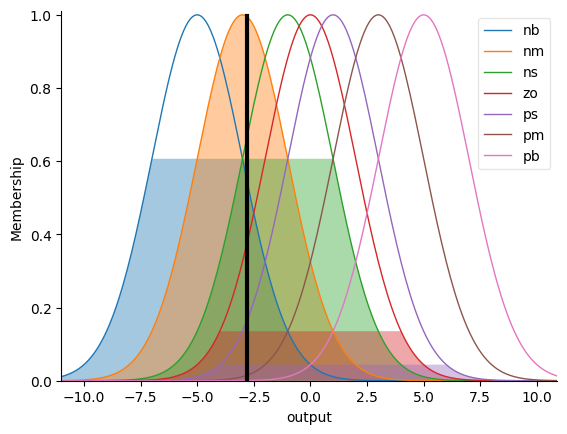

In [12]:
output.view(sim=sim)

In [13]:
print(rule5)

IF ((((error[pb] AND delta[ps]) OR (error[pm] AND delta[pm])) OR (error[pb] AND delta[pm])) OR (error[ps] AND delta[pb])) OR (error[pm] AND delta[pb]) THEN output[pm]
	AND aggregation function : fmin
	OR aggregation function  : fmax
